In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

print(train.head())
print(test.shape)

  class  b1  b2  b3   b4  b5   b6   b7  b8  b9  ...  pred_minus_obs_H_b9  \
0    d   39  36  57   91  59  101   93  27  60  ...                -2.36   
1    h   84  30  57  112  51   98   92  26  62  ...                -2.26   
2    s   53  25  49   99  51   93   84  26  58  ...                -1.46   
3    s   59  26  49  103  47   92   82  25  56  ...                 2.68   
4    d   57  49  66  103  64  106  114  28  59  ...                -2.94   

   pred_minus_obs_S_b1  pred_minus_obs_S_b2  pred_minus_obs_S_b3  \
0               -18.41                -1.88                -6.43   
1               -16.27                -1.95                -6.25   
2               -15.92                -1.79                -4.64   
3               -13.77                -2.53                -6.34   
4               -21.74                -1.64                -4.62   

   pred_minus_obs_S_b4  pred_minus_obs_S_b5  pred_minus_obs_S_b6  \
0               -21.03                -1.60                -6.18  

In [3]:
X_train = train.drop(['class'], axis=1)
y_train = train['class']
X_val, X_test, y_val, y_test = train_test_split(test.drop(['class'], axis=1), test['class'], test_size=0.5, random_state=42)

print('X_train size: {}'.format(X_train.shape))
print('y_train size: {}'.format(y_train.shape))
print('X_val size: {}'.format(X_val.shape))
print('y_val size: {}'.format(y_val.shape))
print('X_test size: {}'.format(X_test.shape))
print('y_test size: {}'.format(y_test.shape))

X_train size: (198, 27)
y_train size: (198,)
X_val size: (162, 27)
y_val size: (162,)
X_test size: (163, 27)
y_test size: (163,)


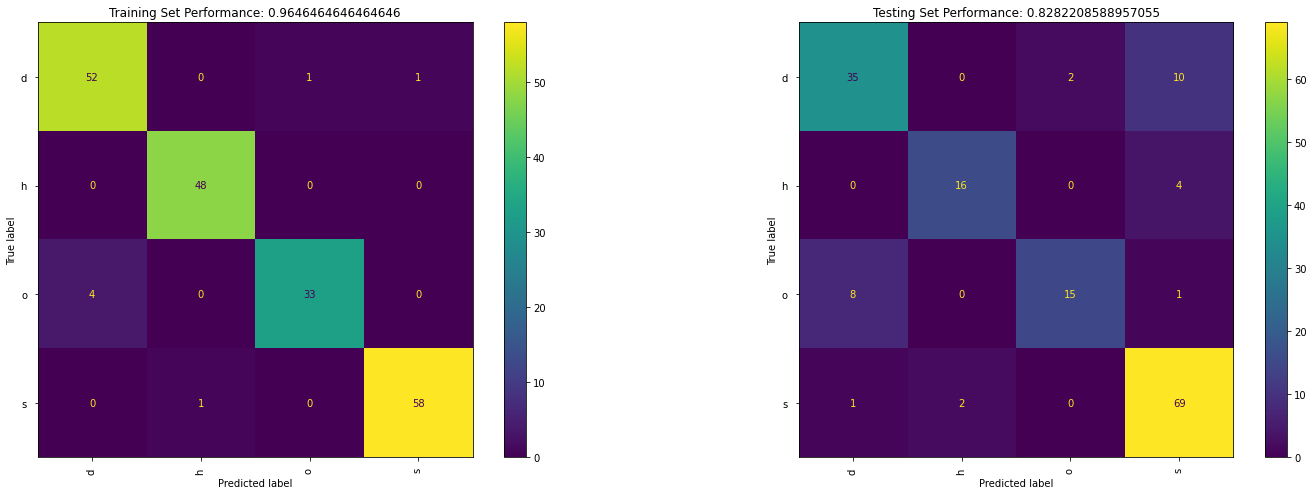

In [6]:
# Train a K Nearest Neighbors classifier
nearest_n = 5
weight = 'uniform'

def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = plot_confusion_matrix(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = plot_confusion_matrix(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));

knn = KNC(nearest_n, weights=weight)
knn.fit(X_train, y_train)
eval_model(knn, X_train, y_train, X_test, y_test)

    

Text(0, 0.5, 'Accuracy')

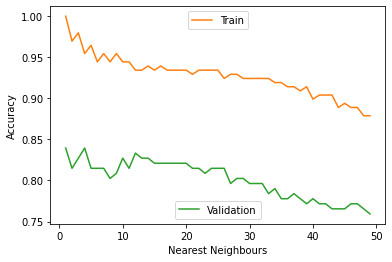

In [8]:
# Test for different values of n-neighbours
train_scores = []
val_scores = []
neighbours = []

for nearest_n in range(1,50):
    knn = KNC(nearest_n, weights=weight)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    val_scores.append(knn.score(X_val, y_val))
    neighbours.append(nearest_n)
    
fig2, ax2 = plt.subplots()
Train = ax2.plot(neighbours, train_scores, color='C1', label='Train')
Validation = ax2.plot(neighbours, val_scores, color='C2', label='Validation')
first_legend = ax2.legend(handles =Train, 
                         loc ='upper center')
  
ax2.add_artist(first_legend)
ax2.legend(handles =Validation, loc ='lower center')
plt.xlabel("Nearest Neighbours")
plt.ylabel("Accuracy")

4


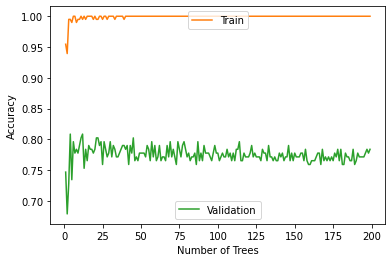

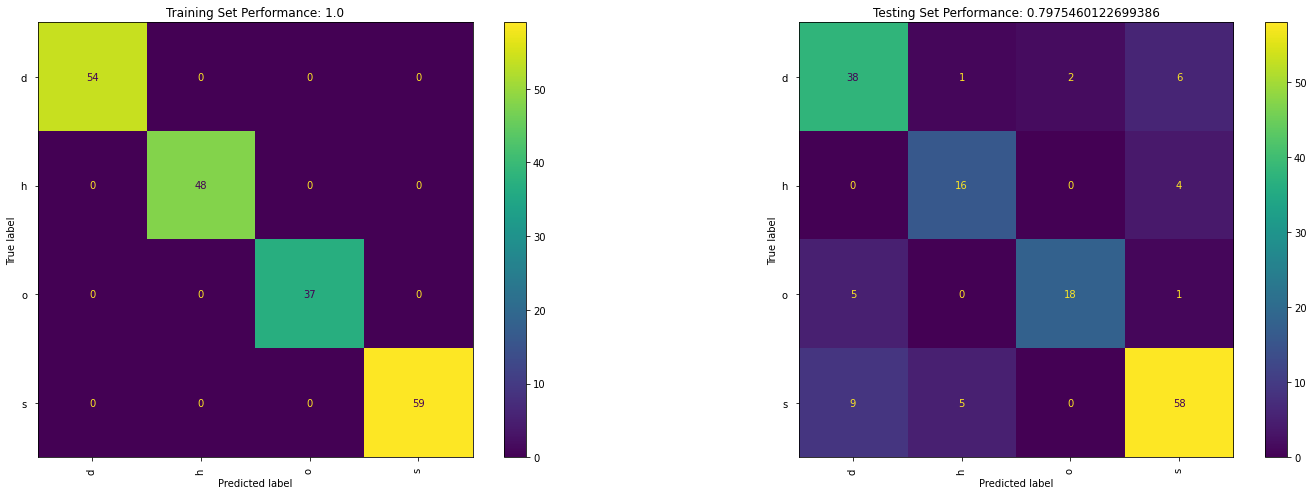

In [21]:
# Now for the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

trees_max = 200  # Number of trees used in Random Forest Classifier
criteria = 'entropy' # Critereon for assessing splits


train_scores = []
val_scores = []
n_trees = []
top_accuracy = 0

for trees in range(1, trees_max):
    rfc = RandomForestClassifier(n_estimators=trees, criterion=criteria)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_train)
    train_scores.append(sum(pred == y_train)/len(y_train))
    pred = rfc.predict(X_val)
    val_accuracy = sum(pred == y_val)/len(y_val)
    val_scores.append(val_accuracy)
    n_trees.append(trees)
    if val_accuracy > top_accuracy:
        top_accuracy = val_accuracy
        trees_best = trees
    
fig, ax = plt.subplots()
Train = ax.plot(n_trees, train_scores, color='C1', label='Train')
Validation = ax.plot(n_trees, val_scores, color='C2', label='Validation')
first_legend = ax.legend(handles =Train, 
                         loc ='upper center')
  
ax.add_artist(first_legend)
ax.legend(handles =Validation, loc ='lower center')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")

# Fit model using the best parameters
rfc = RandomForestClassifier(n_estimators=trees_best, criterion=criteria)
rfc.fit(X_train, y_train)
eval_model(rfc, X_train, y_train, X_test, y_test)

print(trees_best)

In [ ]:
# Lastly the SVM model, This model will be slightly different as SVM is for binary only
